

Exercise 1 : Classification Models with Iris dataset Prediction


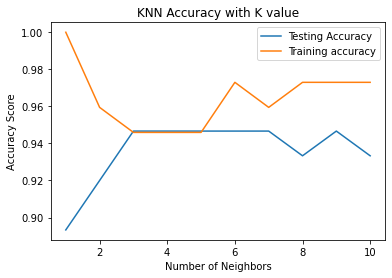

In [91]:
## KNN  classifier

# Load helpers
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import sklearn.metrics
import sklearn.neighbors


# Load Data
iris_df = pd.read_csv('iris_dataset.csv')
iris_df.columns =['sepal_lenth', 'sepal_width', 'petal_lenth','petal_width','iris_species']
iris_df

# Seperate data with features and labels
X = iris_df.drop('iris_species', 1) #features
y = iris_df['iris_species']  #labels

# Transform categorical label to number
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataframe into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=26) #split by half

# Normalizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Find best K-value
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,11)#range for k_value
#space for accuracy score
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Show by graph
plt.figure()
plt.title('KNN Accuracy with K value')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.xticks()
plt.yticks()
plt.legend()
plt.show()

In [90]:
# Apply best k-value with prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) #best k-value of 4
knn.fit(X_train, y_train)
prediction = knn.predict([[1, 5, 0.4, 0.2]])# Pridict iris_species has 1cm x 5cm sepal and 0.4cm x 0.2cm petal

print(prediction)


[0]


In [97]:
# Accurancy of this KNN classifier with best k_value
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(test_accuracy)


0.9466666666666667


In [118]:
## Naive Bayes

# Load helpers

%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from dmba import classificationSummary, gainsChart
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load Data
iris_df = pd.read_csv('iris_dataset.csv')
iris_df.columns =['sepal_lenth', 'sepal_width', 'petal_lenth','petal_width','iris_species']
iris_df

# Seperate data with features and labels
X = iris_df.drop('iris_species', 1) #features
y = iris_df['iris_species']  #labels
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Split the dataframe into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=26) #split by half

# Run Naive Bayes
iris_nb = GaussianNB()
iris_nb.fit(X_train, y_train)

# Prediction
y_test_pred = iris_nb.predict(X_test)
y_train_pred = iris_nb.predict(X_train)

df = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred})
df

prediction = iris_nb.predict([[5.1, 3.5, 1.4, 0.2]])
print(prediction)

# Accurancy for Naive Bayes classifier
classificationSummary(y_test, y_test_pred, class_names=classes) 
print()


['Iris-setosa']
Confusion Matrix (Accuracy 0.9733)

                Prediction
         Actual     Iris-setosa Iris-versicolor  Iris-virginica
    Iris-setosa              28               0               0
Iris-versicolor               0              21               1
 Iris-virginica               0               1              24



In [141]:
## Logistic Regression

# Load helpers
!pip install mord
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart,liftChart
from dmba.metric import AIC_score

# Load Data
iris_df = pd.read_csv('iris_dataset.csv')
iris_df.columns =['sepal_lenth', 'sepal_width', 'petal_lenth','petal_width','iris_species']
iris_df

# Treat iris_species as categorical, convert to dummy variables
iris_df['iris_species'] =iris_df['iris_species'].astype('category')
new_categories = {1: 'Iris-setosa', 2: 'Iris-versicolor', 3:'Iris-virginica'}


# Seperate data with features and labels
X = iris_df.drop('iris_species', 1) #features
y = iris_df['iris_species']  #labels


# Split the dataframe into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=26) #split by half

# Normalizing features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Run Logistic Regression
logit_reg = LogisticRegression(penalty="l2", C=1e42,solver='liblinear')
logit_reg.fit(X_train, y_train)
print('intercept ', logit_reg.intercept_[0])

logit_reg_pred = logit_reg.predict(X_test)
logit_reg_proba = logit_reg.predict_proba(X_test)
logit_result = pd.DataFrame({'actual': y_test,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })
print(logit_result)

# Use score method to get accuracy of model
Accuracy = logit_reg.score(X_test, y_test)
print(Accuracy)


intercept  -10.738134125771255
              actual          p(0)      p(1)        predicted
31       Iris-setosa  9.699436e-01  0.030056      Iris-setosa
69   Iris-versicolor  9.045896e-09  0.235637   Iris-virginica
21       Iris-setosa  9.460252e-01  0.053975      Iris-setosa
75   Iris-versicolor  6.589027e-09  0.988036  Iris-versicolor
95   Iris-versicolor  5.424998e-06  0.999681  Iris-versicolor
..               ...           ...       ...              ...
94   Iris-versicolor  3.386081e-05  0.999915  Iris-versicolor
68   Iris-versicolor  5.302388e-06  0.999983  Iris-versicolor
146   Iris-virginica  8.430364e-12  0.185176   Iris-virginica
32       Iris-setosa  9.855144e-01  0.014486      Iris-setosa
80   Iris-versicolor  1.835513e-05  0.999980  Iris-versicolor

[75 rows x 4 columns]
0.9866666666666667


By using KNN,Naive Bayes and Logistic Regression to classify and predict iris_species in the iris dataset, we can rank these three classification model by their accurancy score:


1. Logistic Regression: 0.9866666666666667
2. Naive Bayes: 0.9733
3. KNN:0.9466666666666667



Exercise 2 Muti-Regression Models with Bike Sharing Dataset Prediction


In [145]:
# Load helpers
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# Load datasets
day_df = pd.read_csv('day.csv')
print(day_df.head())
hour_df = pd.read_csv('hour.csv')
print(hour_df.head())


day_df.describe()
hour_df.describe()





   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [173]:
# Do Some Exploratory Analysis first
# Explore realationship between casual users,total user and some time-realated features

# count of causal users group by season
day_df_season_c= day_df[['season','casual']]
print(day_df_season_c.groupby('season').sum())

# count of causal users group by weekday
day_df_weekday_c= day_df[['weekday','casual']]
print(day_df_weekday_c.groupby('weekday').sum())

# count of causal users group by hour
day_df_hr_c= hour_df[['hr','casual']]
print(day_df_hr_c.groupby('hr').sum())

# total count of both causal and registered users group by season
day_df_season= day_df[['season','cnt']]
day_df_season
print(day_df_season.groupby('season').sum())

# total count of both causal and registered users group by weekday
day_df_weekday= day_df[['weekday','cnt']]
day_df_weekday
print(day_df_weekday.groupby('weekday').sum())

# total count of both causal and registered users group by hour
day_df_hr= hour_df[['hr','cnt']]
day_df_hr
print(day_df_hr.groupby('hr').sum())




        casual
season        
1        60622
2       203522
3       226091
4       129782
         casual
weekday        
0        140521
1         70784
2         57843
3         57319
4         61460
5         78238
6        153852
    casual
hr        
0     7375
1     4709
2     3412
3     1893
4      874
5     1012
6     3017
7     8037
8    15761
9    22458
10   33789
11   43286
12   49718
13   52713
14   55089
15   54606
16   53834
17   54220
18   44496
19   35505
20   26378
21   20570
22   16200
23   11065
            cnt
season         
1        471348
2        918589
3       1061129
4        841613
            cnt
weekday        
0        444027
1        455503
2        469109
3        473048
4        485395
5        487790
6        477807
       cnt
hr        
0    39130
1    24164
2    16352
3     8174
4     4428
5    14261
6    55132
7   154171
8   261001
9   159438
10  126257
11  151320
12  184414
13  184919
14  175652
15  183149
16  227748
17  336860
18  309772
19  22678

Based on the results above, we can see that season 3, summer, has most casual users and total user
Around 17:00, has most casual user and total user

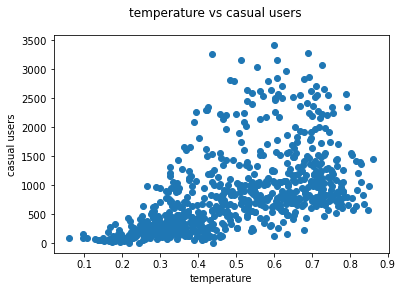

In [184]:
# Exploratory Analysis with Visualizations

# temperature vs casual users
temp = plt.scatter(day_df['temp'], day_df['casual'])
plt.suptitle('temperature vs casual users')
plt.xlabel('temperature')
plt.ylabel('casual users')
print(temp)




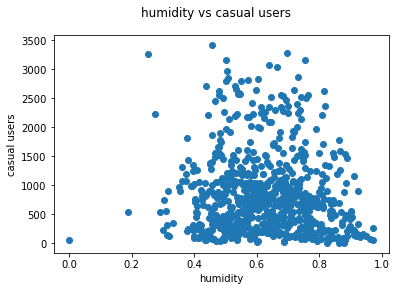

In [185]:
# humidity vs casual users
hum = plt.scatter(day_df['hum'], day_df['casual'])
plt.suptitle('humidity vs casual users')
plt.xlabel('humidity')
plt.ylabel('casual users')
print(hum)

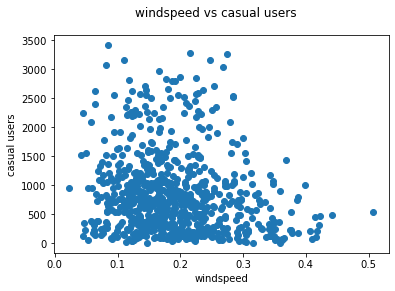

In [186]:
# windspeed vs casual users
wind = plt.scatter(day_df['windspeed'], day_df['casual'])
plt.suptitle('windspeed vs casual users')
plt.xlabel('windspeed')
plt.ylabel('casual users')
print(hum)

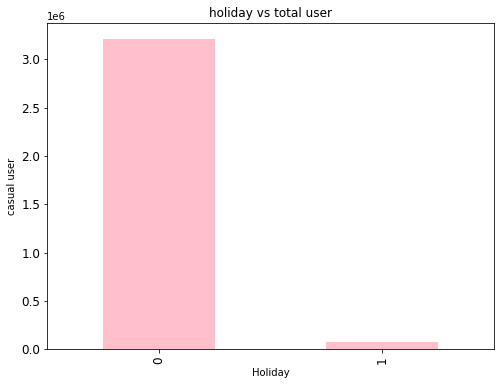

In [224]:
# holiday vs casual users
ax = day_df[['holiday','cnt']].groupby(['holiday']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="holiday vs total user", 
                                       color='pink', fontsize=12)
ax.set_xlabel("Holiday")
ax.set_ylabel("casual user")
plt.show()

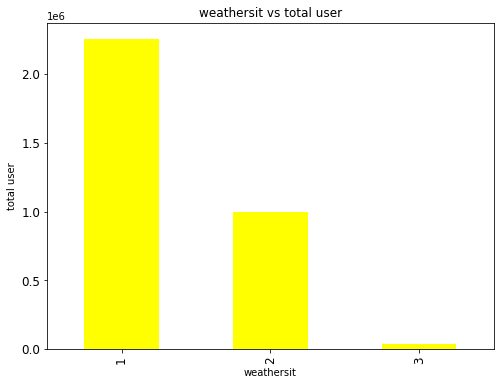

In [223]:
# weathersit vs total user
ax = day_df[['weathersit','cnt']].groupby(['weathersit']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="weathersit vs total user", 
                                       color='yellow', fontsize=12)
ax.set_xlabel("weathersit")
ax.set_ylabel("total user")
plt.show()

In [208]:
# Prepare for prediction
# Based on above exploratory analysis and visualizations
#I decide to only choose features of season,hr,temperature,weathersit,and holiday

### Predict casual users with day dataset
day_df = pd.read_csv('day.csv')
predictors = ['season', 'temp', 'holiday','weathersit']
outcome = 'casual'

# partition data
X = day_df[predictors]
y = day_df[outcome]
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=9)

# Linear Regression
day_casual_lm = LinearRegression()
day_casual_lm.fit(train_X, train_y)
print('intercept ', day_casual_lm .intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': day_casual_lm.coef_}))# print coefficients
regressionSummary(train_y, day_casual_lm.predict(train_X))# print performance measures

pred_y = day_casual_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, day_casual_lm))
print('AIC : ', AIC_score(train_y, pred_y, day_casual_lm))
print('BIC : ', BIC_score(train_y, pred_y, day_casual_lm))

# Make predictions on a valid set
day_casual_lm_pred = day_casual_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': day_casual_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - day_casual_lm_pred})
print(result.head(20))
print('\n\nLinnear Regression')
regressionSummary(valid_y, day_casual_lm_pred)

# Lasso
print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('\n\nLasso-CV chosen regularization: ', lasso_cv.alpha_)
print('\n\nLasso coefficients', lasso_cv.coef_)

# Ridge
print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))






intercept  254.73055610744575
    Predictor  coefficient
0      season    21.901616
1        temp  1774.735452
2     holiday   300.352439
3  weathersit  -279.282099

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 526.8608
            Mean Absolute Error (MAE) : 370.8606
          Mean Percentage Error (MPE) : -45.7065
Mean Absolute Percentage Error (MAPE) : 80.7576
adjusted r2 :  0.3455529447350705
AIC :  5622.68871560152
BIC :  5646.088099723015
       Predicted  Actual     Residual
730   101.114450     439   337.885550
99    497.190640    1188   690.809360
311   787.737971     376  -411.737971
603   921.364442    1483   561.635558
503  1020.498864    1521   500.501136
89    -63.092422     179   242.092422
132   649.521508     692    42.478492
478   310.843418     195  -115.843418
124   834.151641     614  -220.151641
589  1284.946475    2182   897.053525
394   475.050290     126  -349.050290
106   829.714803    1558   728

In [215]:
### Predict casual users with hour dataset
hour_df = pd.read_csv('hour.csv')
predictors = ['season', 'temp','weathersit', 'holiday','hr']
outcome = 'casual'

# partition data
X = hour_df[predictors]
y = hour_df[outcome]
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=9)

# Linear Regression
hour_casual_lm = LinearRegression()
hour_casual_lm.fit(train_X, train_y)
print('intercept ', hour_casual_lm .intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': hour_casual_lm.coef_}))# print coefficients
regressionSummary(train_y, hour_casual_lm.predict(train_X))# print performance measures

pred_y = hour_casual_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, hour_casual_lm))
print('AIC : ', AIC_score(train_y, pred_y, hour_casual_lm))
print('BIC : ', BIC_score(train_y, pred_y, hour_casual_lm))

# Make predictions on a valid set
hour_casual_lm_pred = hour_casual_lm.predict(valid_X)
result = pd.DataFrame({'Predicted':hour_casual_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - hour_casual_lm_pred})
print(result.head(20))
print('\n\nLinnear Regression')
regressionSummary(valid_y, hour_casual_lm_pred)

# Lasso
print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('\n\nLasso-CV chosen regularization: ', lasso_cv.alpha_)
print('\n\nLasso coefficients', lasso_cv.coef_)

# Ridge
print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))


intercept  -25.453357321160297
    Predictor  coefficient
0      season    -0.262081
1        temp   106.544803
2  weathersit    -7.495215
3     holiday    10.469694
4          hr     1.662693

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 42.0279
     Mean Absolute Error (MAE) : 26.3751
adjusted r2 :  0.2737123836639276
AIC :  89637.06484307456
BIC :  89686.55353503244
       Predicted  Actual    Residual
4541   50.096417       0  -50.096417
6457   28.197095      41   12.802905
8653    7.792537       4   -3.792537
6104   53.985927      32  -21.985927
12203  90.966779     223  132.033221
8518   42.218251      28  -14.218251
10376  42.613159      64   21.386841
16526   4.875397       9    4.124603
2421   53.336936      41  -12.336936
13516  44.053773      79   34.946227
15891  23.725182       5  -18.725182
10390  23.855337       2  -21.855337
257   -14.968995       0   14.968995
6653   57.259353     116   58.740647
14602  74.310520     

In [213]:
### Predict registered users with day dataset
day_df = pd.read_csv('day.csv')
predictors = ['season', 'temp', 'holiday','weathersit']
outcome = 'registered'

# partition data
X = day_df[predictors]
y = day_df[outcome]
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=9)

# Linear Regression
day_reg_lm = LinearRegression()
day_reg_lm.fit(train_X, train_y)
print('intercept ', day_reg_lm .intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': day_reg_lm.coef_}))# print coefficients
regressionSummary(train_y, day_reg_lm.predict(train_X))# print performance measures

pred_y = day_reg_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, day_reg_lm))
print('AIC : ', AIC_score(train_y, pred_y, day_reg_lm))
print('BIC : ', BIC_score(train_y, pred_y, day_reg_lm))

# Make predictions on a valid set
day_reg_lm_pred = day_reg_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': day_reg_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - day_reg_lm_pred})
print(result.head(20))
print('\n\nLinnear Regression')
regressionSummary(valid_y, day_reg_lm_pred)

# Lasso
print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('\n\nLasso-CV chosen regularization: ', lasso_cv.alpha_)
print('\n\nLasso coefficients', lasso_cv.coef_)

# Ridge
print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))


intercept  2145.2400565904973
    Predictor  coefficient
0      season   456.404162
1        temp  3076.579250
2     holiday  -839.647006
3  weathersit  -799.046940

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1211.8614
            Mean Absolute Error (MAE) : 1027.4434
          Mean Percentage Error (MPE) : -18.9094
Mean Absolute Percentage Error (MAPE) : 39.4212
adjusted r2 :  0.3922135702849556
AIC :  6230.7614675944005
BIC :  6254.160851715896
       Predicted  Actual     Residual
730  1667.577669    2290   622.422331
99   2772.629340    1707 -1065.629340
311  4428.078599    3829  -599.078599
603  3926.389414    3772  -154.389414
503  3994.705926    6118  2123.294074
89   1486.455301    1506    19.544699
132  3036.701367    3413   376.298633
478  2449.588519    3019   569.411481
124  3671.665105    3819   147.334895
589  4871.573868    4362  -509.573868
394  2630.710886    3498   867.289114
106  3663.973657    2186 

In [221]:
### Predict registered users with hour dataset
hour_df = pd.read_csv('hour.csv')
predictors = ['season', 'temp', 'holiday','weathersit','hr']
outcome = 'registered'

# partition data
X = hour_df[predictors]
y = hour_df[outcome]
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=9)

# Linear Regression
hour_reg_lm = LinearRegression()
hour_reg_lm.fit(train_X, train_y)
print('intercept ', day_reg_lm .intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': hour_reg_lm.coef_}))# print coefficients
regressionSummary(train_y, hour_reg_lm.predict(train_X))# print performance measures

pred_y = hour_reg_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, hour_reg_lm))
print('AIC : ', AIC_score(train_y, pred_y, hour_reg_lm))
print('BIC : ', BIC_score(train_y, pred_y, hour_reg_lm))

# Make predictions on a valid set
hour_reg_lm_pred = hour_reg_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': hour_reg_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - hour_reg_lm_pred})
print(result.head(20))
print('\n\nLinnear Regression')
regressionSummary(valid_y, hour_reg_lm_pred)

# Lasso
print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('\n\nLasso-CV chosen regularization: ', lasso_cv.alpha_)
print('\n\nLasso coefficients', lasso_cv.coef_)

# Ridge
print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))


intercept  -37.70508201956886
    Predictor  coefficient
0      season    14.288845
1        temp   201.104617
2     holiday   -38.951412
3  weathersit   -18.966226
4          hr     7.334776

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 133.4148
     Mean Absolute Error (MAE) : 94.6870
adjusted r2 :  0.23931733410014044
AIC :  109710.9214593823
BIC :  109760.41015134017
        Predicted  Actual    Residual
4541   157.016971       4 -153.016971
6457   176.003424     154  -22.003424
8653    68.582945      10  -58.582945
6104   244.090512     135 -109.090512
12203  215.217170     278   62.782830
8518   108.420201      69  -39.420201
10376  146.896565     155    8.103435
16526  107.427388     629  521.572612
2421   156.779651     168   11.220349
13516  165.971032     179   13.028968
15891  188.544749      76 -112.544749
10390   69.526714      25  -44.526714
257      0.441736       1    0.558264
6653   252.463399     186  -66.463399
1460

In [217]:
### Predict Total users with day dataset
day_df = pd.read_csv('day.csv')
predictors = ['season', 'temp', 'holiday','weathersit']
outcome = 'cnt'

# partition data
X = day_df[predictors]
y = day_df[outcome]
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=9)

# Linear Regression
day_cnt_lm = LinearRegression()
day_cnt_lm.fit(train_X, train_y)
print('intercept ', day_cnt_lm .intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': day_cnt_lm.coef_}))# print coefficients
regressionSummary(train_y, day_cnt_lm.predict(train_X))# print performance measures

pred_y = day_cnt_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, day_cnt_lm))
print('AIC : ', AIC_score(train_y, pred_y, day_cnt_lm))
print('BIC : ', BIC_score(train_y, pred_y, day_cnt_lm))

# Make predictions on a valid set
day_cnt_lm_pred = day_cnt_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': day_cnt_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - day_cnt_lm_pred})
print(result.head(20))
print('\n\nLinnear Regression')
regressionSummary(valid_y, day_cnt_lm_pred)

# Lasso
print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('\n\nLasso-CV chosen regularization: ', lasso_cv.alpha_)
print('\n\nLasso coefficients', lasso_cv.coef_)

# Ridge
print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))


intercept  2399.970612697942
    Predictor  coefficient
0      season   478.305777
1        temp  4851.314702
2     holiday  -539.294567
3  weathersit -1078.329039

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1365.6186
            Mean Absolute Error (MAE) : 1146.2353
          Mean Percentage Error (MPE) : -16.2768
Mean Absolute Percentage Error (MAPE) : 35.3828
adjusted r2 :  0.48465120035219234
AIC :  6317.959947242827
BIC :  6341.359331364322
       Predicted  Actual     Residual
730  1768.692119    2729   960.307881
99   3269.819980    2895  -374.819980
311  5215.816570    4205 -1010.816570
603  4847.753856    5255   407.246144
503  5015.204790    7639  2623.795210
89   1423.362879    1685   261.637121
132  3686.222875    4105   418.777125
478  2760.431936    3214   453.568064
124  4505.816747    4433   -72.816747
589  6156.520343    6544   387.479657
394  3105.761176    3624   518.238824
106  4493.688460    3744  

In [222]:
### Predict total users with hour dataset
hour_df = pd.read_csv('hour.csv')
predictors = ['season', 'temp', 'holiday','weathersit','hr']
outcome = 'cnt'

# partition data
X = hour_df[predictors]
y = hour_df[outcome]
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5, random_state=9)

# Linear Regression
hour_cnt_lm = LinearRegression()
hour_cnt_lm.fit(train_X, train_y)
print('intercept ', hour_cnt_lm .intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': hour_cnt_lm.coef_}))# print coefficients
regressionSummary(train_y, hour_cnt_lm.predict(train_X))# print performance measures

pred_y = hour_cnt_lm.predict(train_X)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, hour_cnt_lm))
print('AIC : ', AIC_score(train_y, pred_y, hour_cnt_lm))
print('BIC : ', BIC_score(train_y, pred_y, hour_cnt_lm))

# Make predictions on a valid set
hour_cnt_lm_pred = hour_cnt_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': hour_cnt_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - hour_cnt_lm_pred})
print(result.head(20))
print('\n\nLinnear Regression')
regressionSummary(valid_y, hour_cnt_lm_pred)

# Lasso
print('\n\nLasso')
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

print('\n\nLasso Cross-Validation')
lasso_cv = LassoCV(normalize=True, cv=100)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('\n\nLasso-CV chosen regularization: ', lasso_cv.alpha_)
print('\n\nLasso coefficients', lasso_cv.coef_)

# Ridge
print('\n\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))


intercept  -63.15843934072956
    Predictor  coefficient
0      season    14.026764
1        temp   307.649419
2     holiday   -28.481718
3  weathersit   -26.461440
4          hr     8.997468

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 153.6940
            Mean Absolute Error (MAE) : 113.8220
          Mean Percentage Error (MPE) : -277.4983
Mean Absolute Percentage Error (MAPE) : 336.6384
adjusted r2 :  0.2942572659203778
AIC :  112169.90955698374
BIC :  112219.39824894161
        Predicted  Actual    Residual
4541   207.113388       4 -203.113388
6457   204.200519     195   -9.200519
8653    76.375481      14  -62.375481
6104   298.076440     167 -131.076440
12203  306.183950     501  194.816050
8518   150.638453      97  -53.638453
10376  189.509724     219   29.490276
16526  112.302785     638  525.697215
2421   210.116587     209   -1.116587
13516  210.024805     258   47.975195
15891  212.269931      81 -131.26993